# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
from ATARI.TAZ import TAZ

from ATARI.ModelData.particle import Particle, Neutron

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Defining Mean Parameters

In [3]:
eps = 0.005 # convergence factor

# Particle Types:
Target = Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = Neutron

# Mean Parameters
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
false_dens = 1.0/6.0
lvl_dens = [(1-eps)/4.3166, eps/4.3166]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.Spingroup.zip(l, j)
reaction2 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

# 1 Spingroup Case:
SGs = TAZ.Spingroup.zip(l[:1], j[:1])
reaction1 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens[:1], gn2m=gn2m[:1], nDOF=dfn[:1], gg2m=gg2m[:1], gDOF=dfg[:1], spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction1)
distributions = reaction1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_1 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Creating ENCORE pipeline.
Finished ENCORE initialization.
Starting WigBayes
Finished running WigBayes


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction2)
distributions = reaction2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_2 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Finding level-spacing probabilities for group 1.
Creating ENCORE pipeline.
Finished ENCORE initialization.
Starting WigBayes
Finished running WigBayes


### Comparison

Average Error for True Probability  = 0.00083
Average Error for False Probability = 0.00219



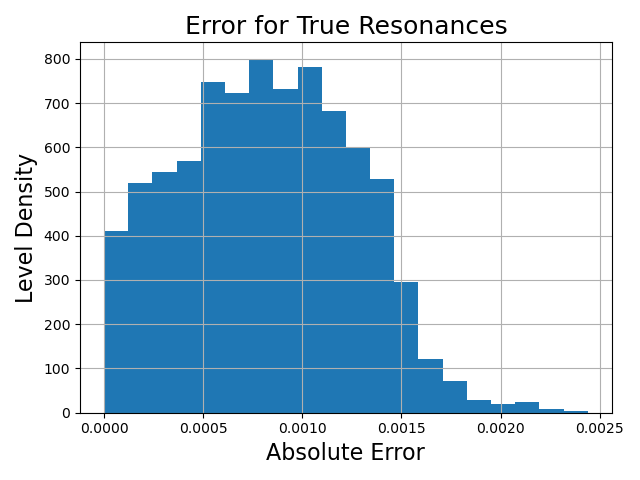

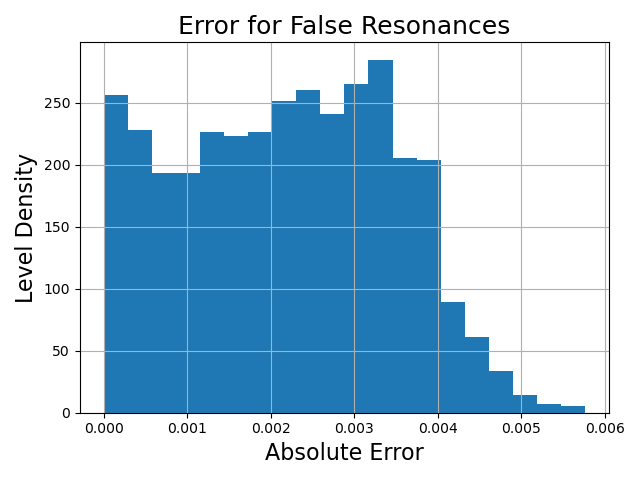

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.461649 0.461206]
 [0.573399 0.572824]
 [0.988311 0.988228]
 [0.43035  0.430162]
 [0.406912 0.40621 ]
 [0.698395 0.697045]
 [0.98903  0.989019]
 [0.556466 0.556003]
 [0.49389  0.493299]
 ...
 [0.896101 0.895826]
 [0.94299  0.942571]
 [0.831373 0.830379]
 [0.489577 0.488636]
 [0.621042 0.61988 ]
 [0.582589 0.582813]
 [0.530882 0.529572]
 [0.821229 0.820115]
 [0.85012  0.849762]]

False Spingroup Posterior:
[[0.538351 0.535074]
 [0.426601 0.424131]
 [0.011689 0.011683]
 [0.56965  0.566505]
 [0.593088 0.589657]
 [0.301605 0.300637]
 [0.01097  0.010934]
 [0.443534 0.440761]
 [0.50611  0.502881]
 ...
 [0.103899 0.103589]
 [0.05701  0.056962]
 [0.168627 0.168213]
 [0.510423 0.507104]
 [0.378958 0.376954]
 [0.417411 0.414663]
 [0.469118 0.466523]
 [0.178771 0.17843 ]
 [0.14988  0.149437]]
